# Credit Card Fraud Classification

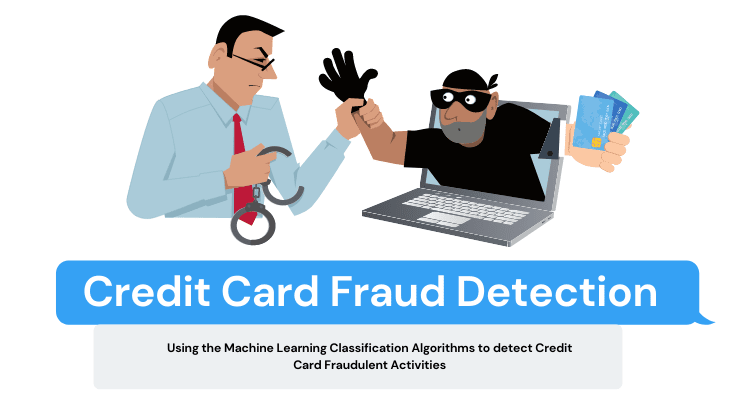

**Problem Statement**

In this notebook we will be discussing about the Credit Card Fraud Classification and will be building a Supervised Learning Model to predict the Fraud Transaction that may have happened.Till this date Fraud Detection is one of the major problems of the banks and companies.Solving this problem will help the banks to identify the Fraud Transaction that may have happened and it will help them to take actions against that. This will reduce the risk of the Fraud Transaction. It will also reduce a lot of manual power that till is used to identify the Fraud Detection and will increase the productivity of the Bank. In India in the month of September about 81 Crore of Fraud Detection has been spotted.


**About the Data**

• Data Source: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud


• The dataset contains the payments information




# Importing the Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\KIRPAL SINGH\Downloads\archive(2)\card_transdata.csv")  

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Extrapolatory Data Analysis

In [4]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [5]:
df.shape

(1000000, 8)

In [6]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

As we can see that distance_from_home , distance_from_last_transaction and ratio_to_median_purchase_price features have a huge amount of null values nearly 82%.

In [7]:
df['distance_from_home'] = df['distance_from_home'].fillna(df['distance_from_home'].mean())
df['distance_from_last_transaction'] = df['distance_from_last_transaction'].fillna(df['distance_from_last_transaction'].mean())
df['ratio_to_median_purchase_price'] = df['ratio_to_median_purchase_price'].fillna(df['ratio_to_median_purchase_price'].mean())

In [8]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

<AxesSubplot:>

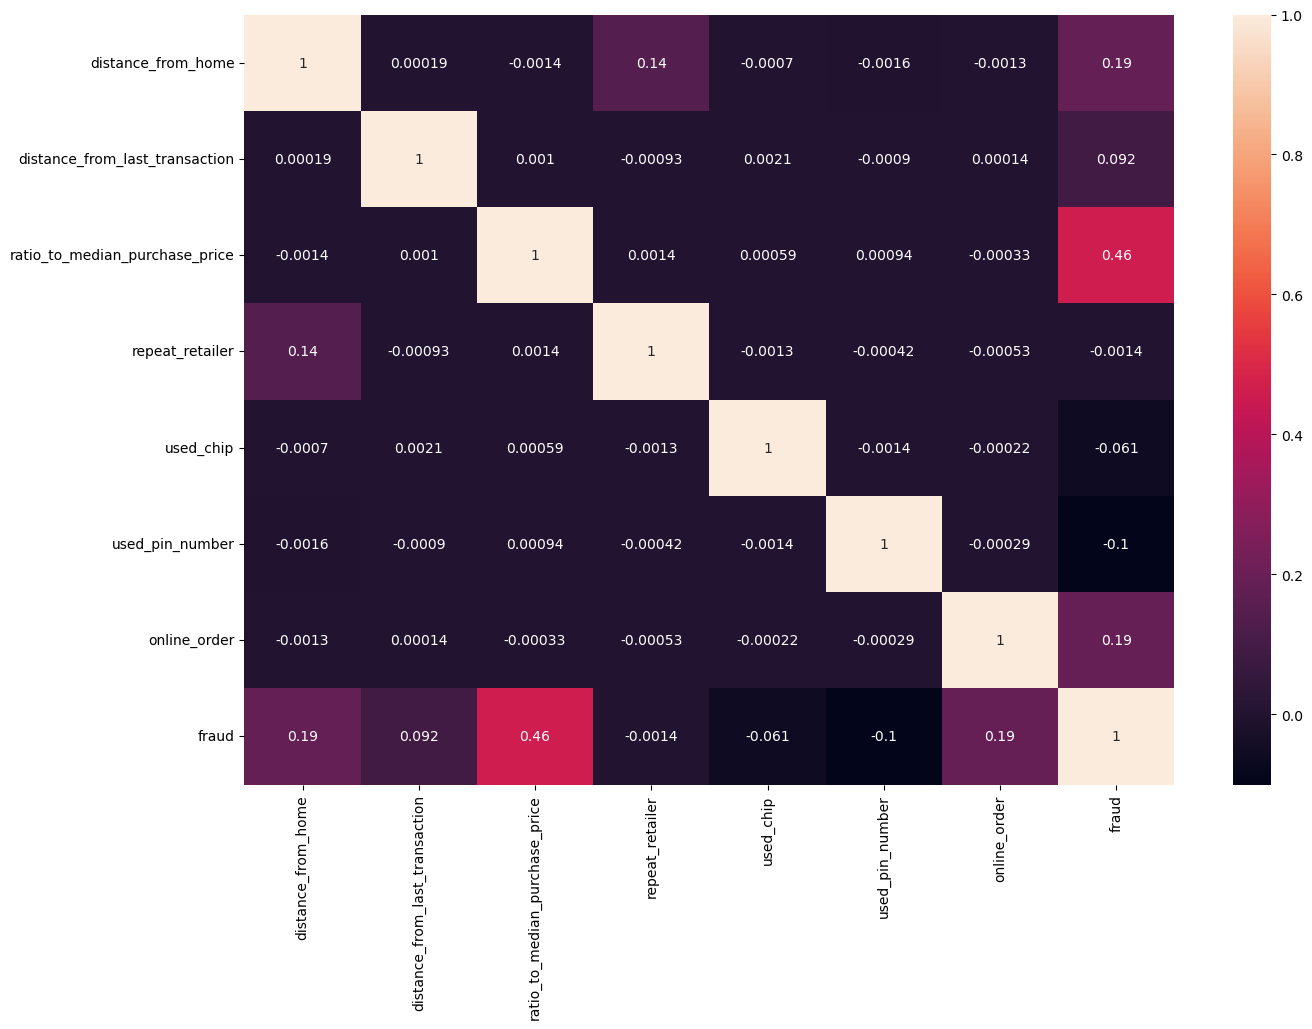

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

By using this Correlation Heatmap we can understand which is highly corelated or very less correlated to the target column.

• The ratio_to_median_purchase_price and the fraud are the most highly correlated that means ratio_to_median_purchase_price feature plays an important role in the prediction of the fraud features.

• Correlation heatmap also helps to check the multicollinearity in the dataset which helps us to drop the features that are highly correlated so that we don't work on one feature twice.

<AxesSubplot:xlabel='fraud', ylabel='count'>

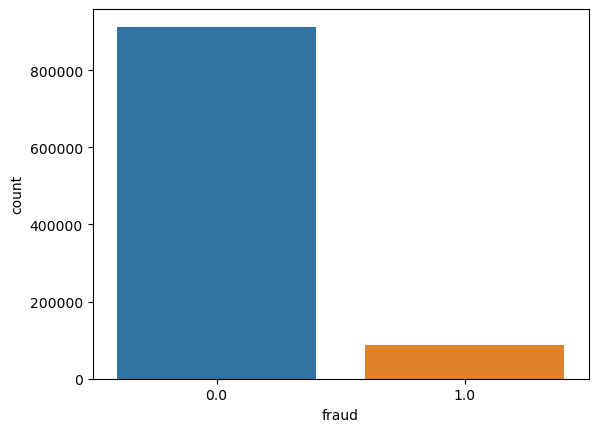

In [10]:
sns.countplot(df["fraud"])

So from this countplot of the fraud feature tells us that the probability of the transaction of being a fraud detection is very low compared to the positive transactions.

In [11]:
normal_transaction = df[df['fraud']==0]
fraud_transaction = df[df['fraud']==1]

In [12]:
print("shape of normal transaction", normal_transaction.shape)
print("shape of fraud transaction", fraud_transaction.shape)

shape of normal transaction (912597, 8)
shape of fraud transaction (87403, 8)


Here I have subset the dataset among the categories of normal_transaction and fraud_transaction. We can see that 
normal_transaction is huge in number compared to fraud transaction. The problem with this type of imbalanced dataset is that the model be biased to the normal_transaction and it may classify the fraud_transaction into normal_transaction which can be a issue

# Down Sampling

Here we will be implementing Down Sampling on the dataset. As the dataset is huge so we can do the down sampling. After the down sampling our dataset will be fully balanced meaning the normal and fraud transaction count will be same

In [13]:
X = df.iloc[:,:7]               #splitting the data into independent and dependent features
Y = df["fraud"]

In [14]:
rus = RandomUnderSampler()
x,y = rus.fit_resample(X,Y)

In [15]:
print("shape of normal transaction", x.shape)
print("shape of fraud transaction", y.shape)

shape of normal transaction (174806, 7)
shape of fraud transaction (174806,)


<AxesSubplot:xlabel='fraud', ylabel='count'>

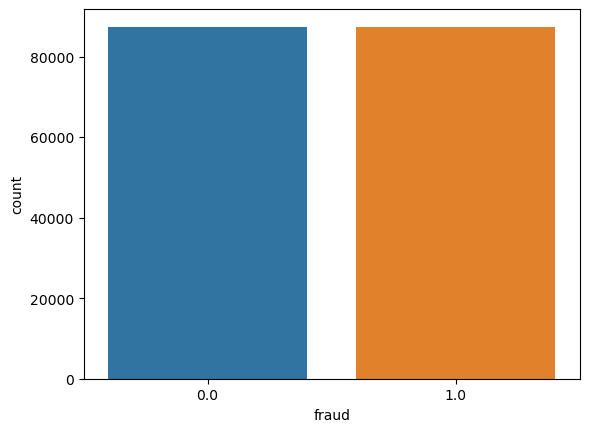

In [16]:
sns.countplot(y)

Now as we can see after the resampling the fraud variable is now balanced with equal number of normal and fraud transaction.

**Data Distributions**

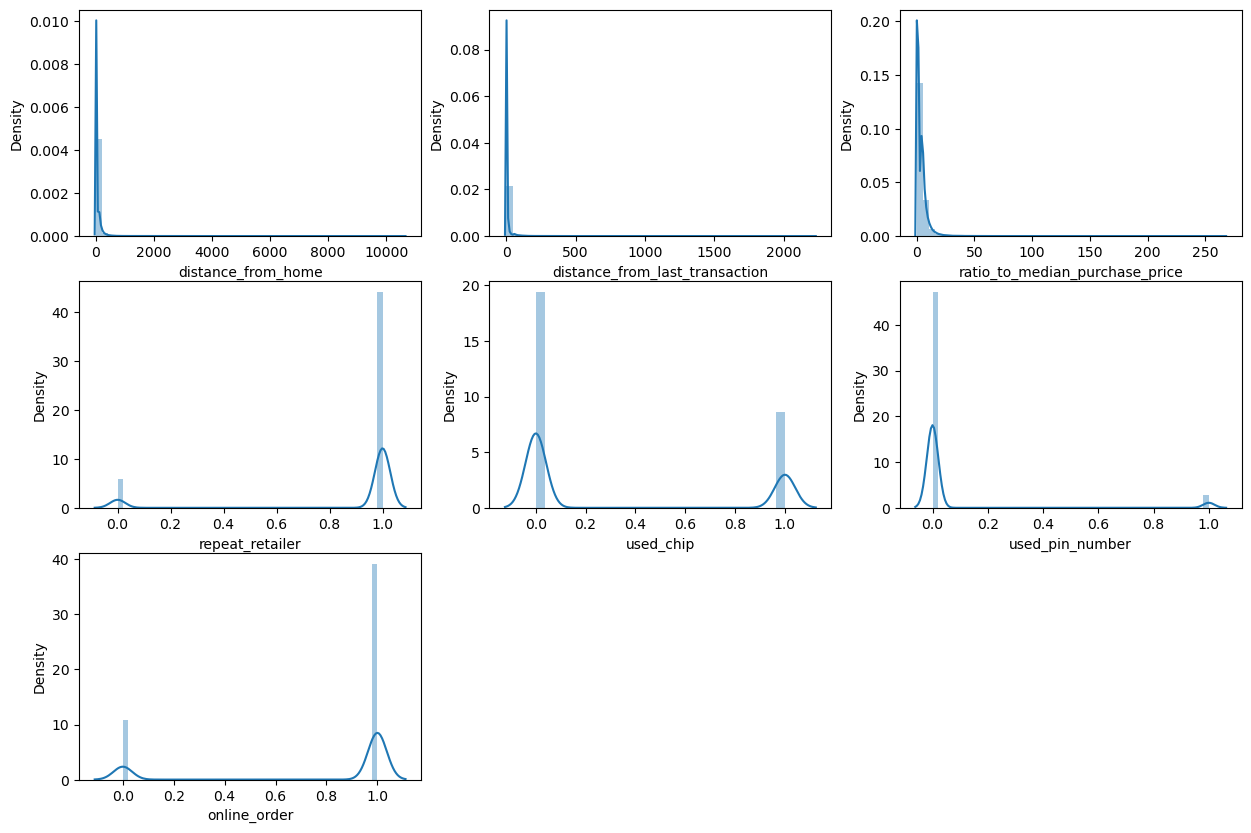

In [17]:
plt.figure(figsize=(15,10))
for idx,col in enumerate(x.columns):
    ax = plt.subplot(3,3,idx+1)
    sns.distplot(x[col])

These subplots shows the distributions of the various features in the dataset.

**Scaling the Continuous Features**

In [18]:
standard_scaler = StandardScaler()
x_res = standard_scaler.fit_transform(x.iloc[:,:3])

In [19]:
cols = x.columns[:3]
new_df = pd.DataFrame({cols[0]:x_res[:,0],cols[1]:x_res[:,1],cols[2]:x_res[:,2]})

In [20]:
x = x.drop(cols,axis=1)

In [21]:
x = pd.concat([new_df,x],axis=1)

In [22]:
x.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.276344,-0.004817,-0.663529,1.0,0.0,0.0,1.0
1,-0.372600,-0.224839,-0.648880,1.0,0.0,0.0,1.0
2,-0.020080,-0.196594,-0.744624,1.0,0.0,0.0,1.0
3,-0.406398,-0.167398,-0.419082,1.0,1.0,0.0,0.0
4,-0.358445,-0.189927,-0.559246,1.0,1.0,0.0,1.0


# Splitting the Data into Train & Test 

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
print(f"shape of x_train {x_train.shape}")
print(f"shape of y_train {y_train.shape}")
print(f"shape of x_test {x_test.shape}")
print(f"shape of y_test {y_test.shape}")

shape of x_train (139844, 7)
shape of y_train (139844,)
shape of x_test (34962, 7)
shape of y_test (34962,)


# Model Buiding 

Looking at the dataset we have a binary classification problem so here we will be fitting the Neural Network Architecture.

In [25]:
Model = Sequential()

In [26]:
Model.add(Dense(7 ,input_shape=(7,),activation="relu"))
Model.add(Dense(500 , activation="relu"))
Model.add(Dense(100 , activation="relu"))
Model.add(Dense(2 , activation="sigmoid"))

In [27]:
Model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [28]:
history = Model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
4371/4371 [==============================] - 14s 3ms/step - loss: 0.0584 - accuracy: 0.9802 - val_loss: 0.0259 - val_accuracy: 0.9906
Epoch 2/3
4371/4371 [==============================] - 13s 3ms/step - loss: 0.0296 - accuracy: 0.9889 - val_loss: 0.0252 - val_accuracy: 0.9915
Epoch 3/3
4371/4371 [==============================] - 15s 3ms/step - loss: 0.0258 - accuracy: 0.9903 - val_loss: 0.0210 - val_accuracy: 0.9917


In [29]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 54,358
Trainable params: 54,358
Non-trainable params: 0
_________________________________________________________________


**Visualizing the Model Results**

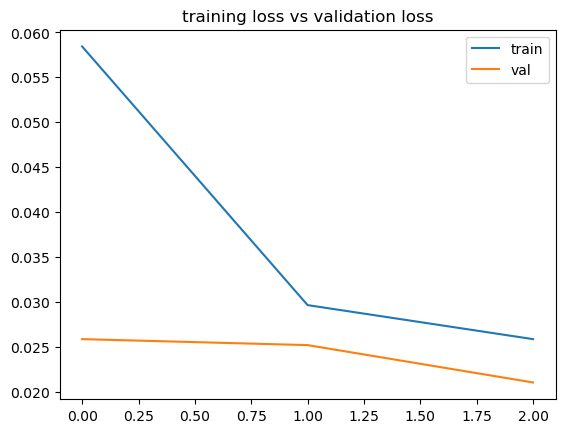

In [30]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("training loss vs validation loss")
plt.legend(["train","val"])

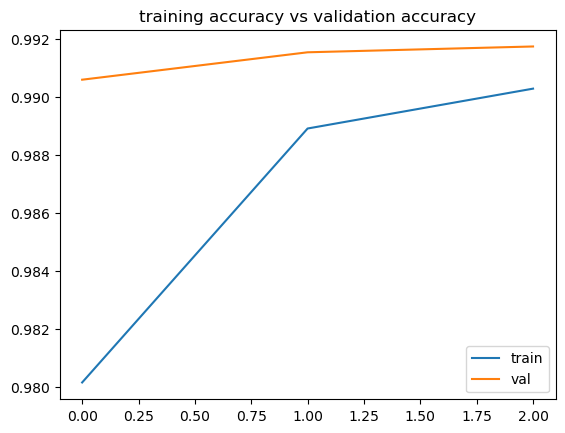

In [31]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("training accuracy vs validation accuracy")
plt.legend(["train","val"])

# Prediction 

In [32]:
y_pred = Model.predict(x_test)

1093/1093 [==============================] - 2s 2ms/step


In [33]:
y_pred = y_pred.argmax(axis=1)

**Calculating the Accuracy Score**

In [34]:
accuracy = accuracy_score(y_pred,y_test)
print(f"The accuracy of the model is {accuracy*100}")

The accuracy of the model is 99.17338825010012


**Printing the Classification Report**

In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17269
           1       0.99      0.99      0.99     17693

    accuracy                           0.99     34962
   macro avg       0.99      0.99      0.99     34962
weighted avg       0.99      0.99      0.99     34962



**Confusion Matrix**

<AxesSubplot:>

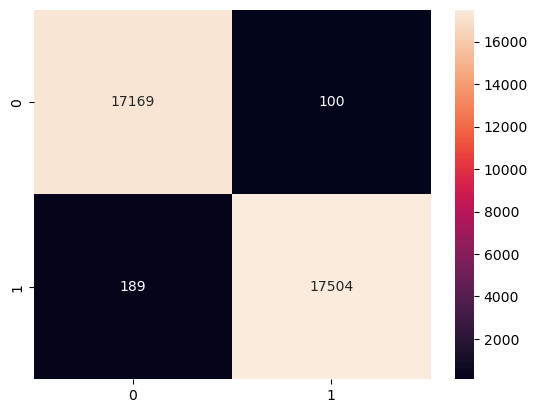

In [36]:
sns.heatmap(confusion_matrix(y_pred,y_test),fmt='g',annot=True)

# Conclusion

**Basic Pipeline Followed**

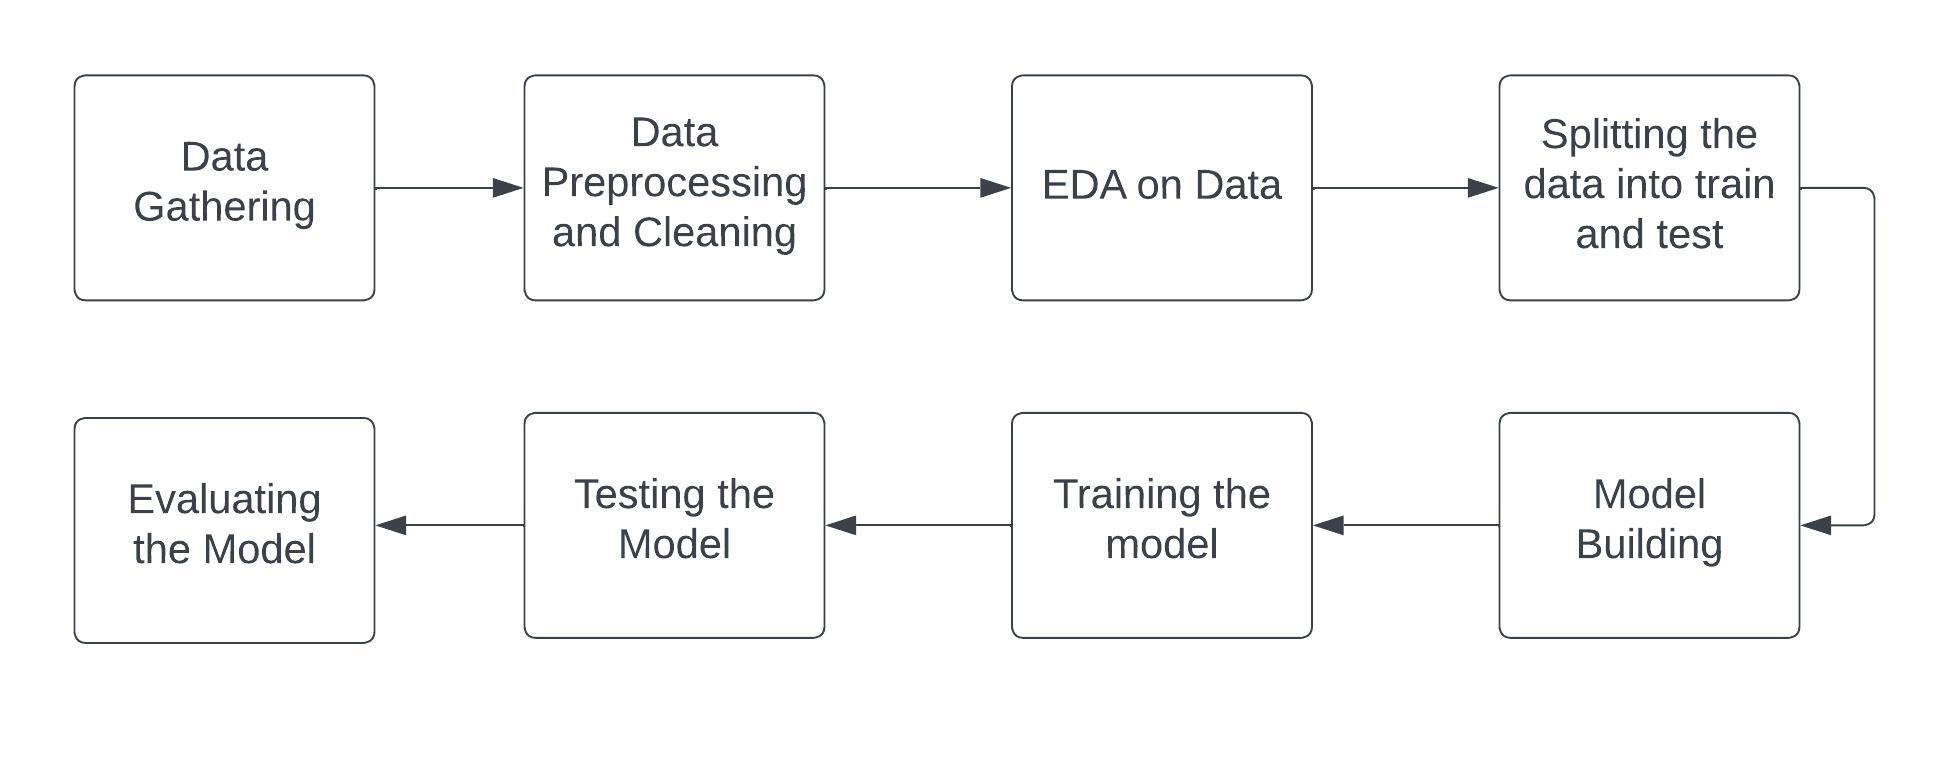

**•** The advantage of our pipeine is that we are making the target column balanced therefore our model will not be biased against the one class only and we are fitting the Neural Networks model which make a robust model and can handle the outliers well.

**•** The model perfectly fits the training and testing data so our model is low bias and low variance. There is no overfitting or underfitting. The model built is generalised

**Feature Importance**

In [37]:
rfc = RandomForestClassifier()

In [38]:
rfc.fit(x,y)

RandomForestClassifier()

In [39]:
imp = rfc.feature_importances_

In [40]:
x_columns = x.columns

In [41]:
imp_df = pd.DataFrame({"importance":imp,"columns":x_columns})

In [42]:
imp_df

,importance,columns
0,0.199192,distance_from_home
1,0.076572,distance_from_last_transaction
2,0.559728,ratio_to_median_purchase_price
3,0.006779,repeat_retailer
4,0.024504,used_chip
5,0.031692,used_pin_number
6,0.101533,online_order


In [43]:
imp_df = imp_df.set_index("columns")

Text(0.5, 1.0, 'feature_importance')

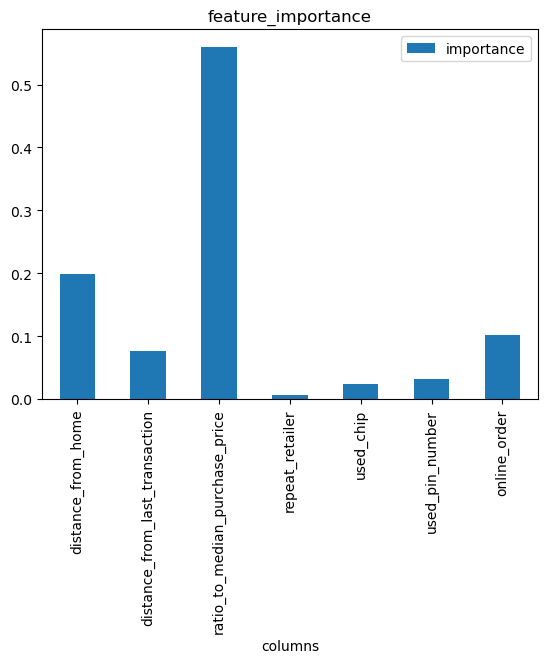

In [44]:
imp_df.plot(kind='bar')
plt.title("feature_importance")

**•** From above feature importance bar plot we can conclude that the ratio_to_median_purchase_price , distance_from_home and online_order are the most importance features in the dataset.

**•** Data Driven to this problem would be using the graphs , statistical measures , facts etc to find whether the transaction is fraud or not.
